# CAR SALES PRICE PREDICTION
In this notebook, I have used the __Car Sales__ dataset to create a machine learning model for the prediction of _overall amount that consumers would spend to purchase a car_ using Data Science techniques.
## 1. Importing Important Libraries

In [97]:
import warnings
warnings.filterwarnings('ignore')

#importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Loading and Exploring the dataset

In [98]:
#importing dataset
sales_data=pd.read_csv('./car_purchasing.csv',encoding='ISO-8859-1')

In [99]:
sales_data

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248
...,...,...,...,...,...,...,...,...,...
495,Walter,ligula@Cumsociis.ca,Nepal,0,41.462515,71942.40291,6995.902524,541670.1016,48901.44342
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,1,37.642000,56039.49793,12301.456790,360419.0988,31491.41457
497,Pearl,penatibus.et@massanonante.com,Philippines,1,53.943497,68888.77805,10611.606860,764531.3203,64147.28888
498,Nell,Quisque.varius@arcuVivamussit.net,Botswana,1,59.160509,49811.99062,14013.034510,337826.6382,45442.15353


In [100]:
#Interpreting data description
sales_data.describe()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


In [101]:
#checking the information about the columns of dataset
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


In [102]:
# For checking any duplicated data of customers
len(sales_data)-len(sales_data.drop_duplicates())

0

After executing the above functions it is clear that we have 500 records and 9 columns. Also the data is not having any null values which saves our time of imputing values. Then I checked for the duplicated values which are also none.

## 3. Exploratory Data Analysis
In this section, we'll explore the data using multiple graphs to see whether if we should drop variables of lesser importance.

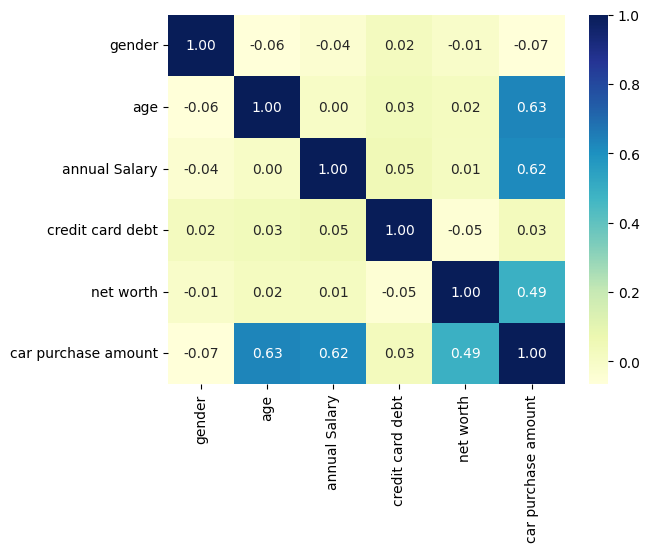

In [103]:
#displaying correlation map to see the correlation between columns of dataset
numeric_data = sales_data.select_dtypes(include=[int, float])
correlation_matrix = numeric_data.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt=".2f")
plt.show()

From the above heatmap we can clearly see that there is a high correlation between car purchase amount and age,annual salary and net worth. While if we look at the gender or credit card debt there we find a very low correlation. So, we can safely drop these variables.

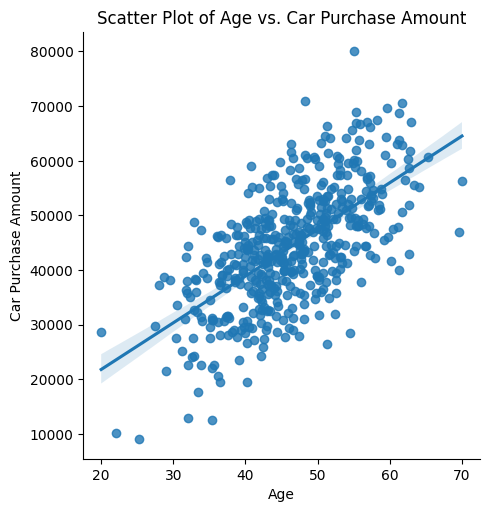

In [104]:
#car purchase trend according to age
sns.lmplot(x='age', y='car purchase amount', data=sales_data)
plt.xlabel('Age')
plt.ylabel('Car Purchase Amount')
plt.title('Scatter Plot of Age vs. Car Purchase Amount')
plt.show()

From the above scatterplot we can get a rough idea that the people who makes the most purchases are aged between approx 30-65. Also we can see a trend that car purchase amount grows linearly with age.

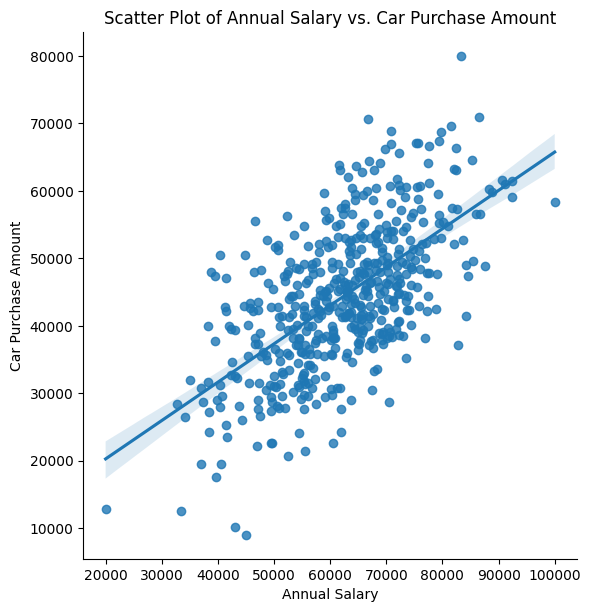

In [105]:
#car purchase trend according to annual salary
sns.lmplot(x='annual Salary', y='car purchase amount', data=sales_data,height=6)
plt.xlabel('Annual Salary')
plt.ylabel('Car Purchase Amount')
plt.title('Scatter Plot of Annual Salary vs. Car Purchase Amount')
plt.show()

From the above scatterplot we can get a rough idea that the people who makes the most purchases have Annual Salary between 40,000-80,000. Also we can see a trend that car purchase amount grows linearly with Annual Salary.

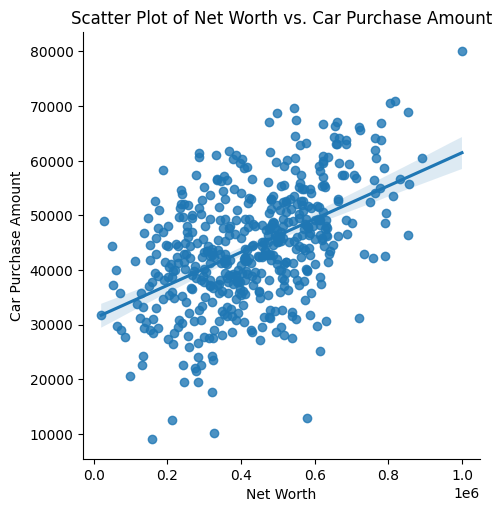

In [106]:
#car purchase trend according to net worth
sns.lmplot(x='net worth', y='car purchase amount', data=sales_data,height=5)
plt.xlabel('Net Worth')
plt.ylabel('Car Purchase Amount')
plt.title('Scatter Plot of Net Worth vs. Car Purchase Amount')
plt.show()

From the above scatterplot we can get a rough idea that the people who makes the most purchases have net worth between approx 100,000-800,000. Also we can see a trend that net worth also grows linearly with age.

## 4. Cleaning Data
In this section, I've dropped the columns customer name, customer email and country because they are irrelevant. Also I've dropped the gender and credit card debt due to their low correlation with car purchase amount.

In [107]:
#dropping passenger id, name, ticket and cabin column 
sales_data = sales_data.drop(['customer name','customer e-mail','country','gender','credit card debt'], axis=1)

In [108]:
sales_data.head()

,age,annual Salary,net worth,car purchase amount
0,41.851720,62812.09301,238961.2505,35321.45877
1,40.870623,66646.89292,530973.9078,45115.52566
2,43.152897,53798.55112,638467.1773,42925.70921
3,58.271369,79370.03798,548599.0524,67422.36313
4,57.313749,59729.15130,560304.0671,55915.46248


## 4. Training and Testing the Model
Splitting the dataset into 80-20 ratio for training and testing the model. For regression, I've used the Linear Regression and for checking accuracy I've used the Mean Squared Error (MSE) and R-squared (R2) score.

In [109]:
#splitting the dataset into 80-20 ratio for training and testing
from sklearn.model_selection import train_test_split

X = sales_data.drop('car purchase amount', axis=1) #Selecting the features
y = sales_data['car purchase amount'] #Selecting the prediction target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Selecting the regressor and training the model
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [110]:
#prediction of overall car purchase amount that consumers would spend to purchase car using test data
y_predict = model.predict(X_test)
print(y_predict)

[61594.43964873 39083.46963555 33763.51835637 33637.58825147
 29415.01044786 58045.10327884 41326.1982333  27816.84007635
 59416.13678004 46891.87360568 41148.88972388 39521.36412343
 33130.21618996 41490.48229458 47241.59300054 45115.0156221
 42210.3764864  67092.55194463 40076.31885544  9001.41294412
 44577.24860316 60460.91121689 34518.7042107  50705.90597903
 29539.66865482 42926.17984951 42703.60029479 57430.61439496
 39002.88950454 36644.25931634 27887.76268586 38900.05604423
 39269.96070929 29757.5015266  52952.67585606 46936.12561624
 54605.84406554 45593.45565978 47979.86178534 45207.54214712
 37161.77170708 24133.49653857 45272.1833426  28439.94310903
 41813.32725807 60223.52719671 41573.87398955 53112.29060399
 48265.64969907 38242.54273208 40103.50307307 42010.55514907
 51552.46501107 41351.88935815 32608.25309863 62865.4078735
 40095.65034228 12895.02134735 31979.61184447 33425.59760952
 57460.24652939 39905.92128509 42481.22743267 42977.14469412
 54757.67648553 26598.7017

In [111]:
#Checking model's perfomance over test data
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

print(f"Mean Squared Error: {mse}")
print(f"R-squared (R2) Score: {r2}")

Mean Squared Error: 2.0957964707734487
R-squared (R2) Score: 0.9999999820460923


Accuracy acheived after testing the model is __99.99%__ which almost predicts the exact amount.

## Author Details
_Hashir Soomro_